In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target

In [ ]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
print(iris['target'])
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.9130434782608695
0.9107142857142857


<Axes: >

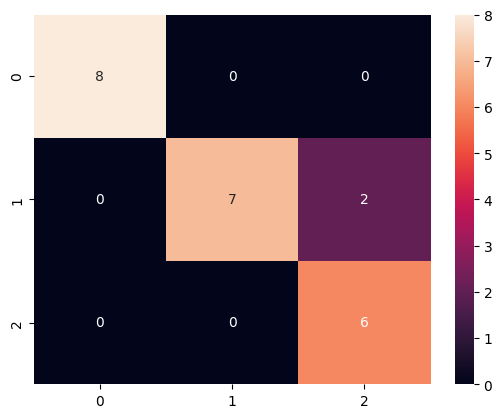

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

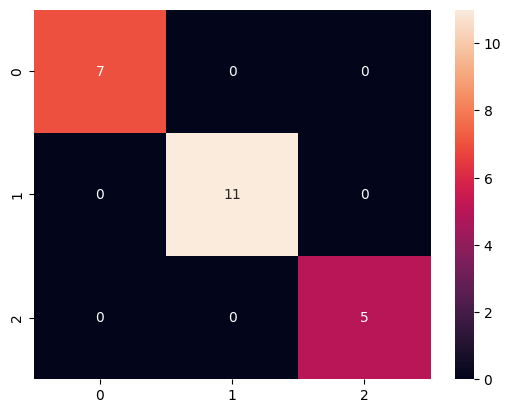

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


<Axes: >

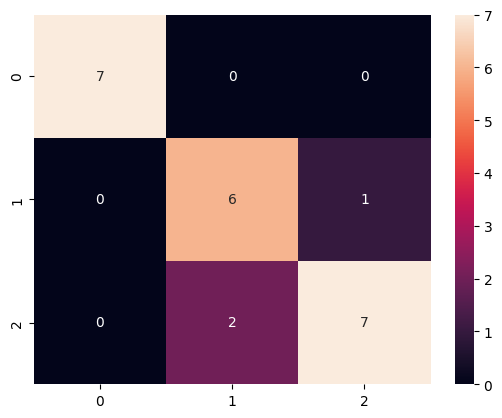

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score

In [ ]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

In [ ]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [ ]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [ ]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


In [ ]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).std())

Среднее по кросс-валидации:  0.03331408853235519


In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


In [ ]:
loo = LeaveOneOut()

In [ ]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


# **1**

In [ ]:
from sklearn.model_selection import LeavePOut

In [ ]:
lpo = LeavePOut(2)

In [ ]:
for i, (train_index, test_index) in enumerate(lpo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Выходные данные были обрезаны до нескольких последних строк (5000).
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126
 127 128 129 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
 Test:  index=[119 130]
Fold 10722:
Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126
 127 128 129 130 132 133 134 135 136 137 138 139 140 141 142 1

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = lpo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. ... 1. 1. 1.]
Среднее по кросс-валидации:  0.9405219985085758


# **2 + 3**

In [ ]:
from sklearn.model_selection import cross_validate

model = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)

cv_results = cross_validate(model, X, y, cv=skf, scoring=('accuracy', 'f1_macro', 'precision_macro'))

print(cv_results)

{'fit_time': array([0.05742359, 0.02712107, 0.02993989]), 'score_time': array([0.00744677, 0.00641108, 0.00618052]), 'test_accuracy': array([0.01351351, 0.02721088, 0.02040816]), 'test_f1_macro': array([0.000401  , 0.00115404, 0.00144126]), 'test_precision_macro': array([0.00020599, 0.00059967, 0.00079012])}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

# **4**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('SVC', SVC()),
    ('KNN', KNeighborsClassifier())
]

skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)

for name, model in models:
    scores = cross_val_score(model, X, y, cv=skf)
    print(f'{name}: Mean Accuracy: {scores.mean():.2f}')

Logistic Regression: Mean Accuracy: 0.97
SVC: Mean Accuracy: 0.96
KNN: Mean Accuracy: 0.98


# **5**

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print(y)

models = [
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor())
]

kf = KFold(n_splits=5, shuffle=True, random_state=15)

for name, model in models:
    scoring = ['neg_mean_squared_error', 'r2']
    scores = cross_validate(model, X, y, cv=kf, scoring=scoring)
    mse_mean = -scores['test_neg_mean_squared_error'].mean()
    r2_mean = scores['test_r2'].mean()
    print(f'{name}:')
    print(f'  Mean MSE: {mse_mean:.2f}')
    print(f'  Mean R2: {r2_mean:.2f}')

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

# **6**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X=iris.data
y=iris.target

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

kf = KFold(n_splits=3,shuffle=True, random_state=15)

scores = cross_val_score(pipeline, X, y, cv=kf)
print("Mean Accuracy:", scores.mean())

Mean Accuracy: 0.94
